# 任务一 复合函数的计算图，计算雅可比行列式

## 1.1 numpy实现

In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Computational_Graph:
    def __init__(self) -> None:
    #初始化x1，x2，x3
        self.x1 = 0
        self.x2 = 0
        self.x3 = 0
        #初始化z1，z2，z3，用以存储z1，z2，z3的计算结果
        self.z1 = 0
        self.z2 = 0
        self.z3 = 0
        #初始化u1，u2，u3，用以存储u1，u2，u3的计算结果
        self.u1 = 0
        self.u2 = 0
        self.u3 = 0
        #初始化v1，v2，v3，用以存储v1，v2，v3的计算结果
        self.u1 = 0
        self.u2 = 0
        self.u3 = 0
        #初始化y1，y2，用以存储y1，y2的计算结果
        self.y1 = 0
        self.y2 = 0 
        
    def function_z1(self,x1,x2):   
        return 2*x1 + x2
    def function_z2(self,x1,x3):
        return  x1 * 3 * x3   
    def function_z3(self,x3):
        return  -x3
    def function_u1(self,z1):
        return  np.sin(self.z1)
    def function_u2(self,x3,z2):
        return (2 * x3)+z2
    def function_u3(self,z1,z3):
        return (2 * z1) + z3
    def function_v1(self,u1,u3):    
        return u1 - u3
    def function_v2(self,u2): 
        return np.sin(-1*u2)      
    def function_v3(self,u1,u3):
        return u1 * u3
    def function_y1(self,v1,v2):
        return v1**2 + v2**3
    def function_y2(self, v2, v3):
        return v2*v3

#前向传播
    def forward(self,x1,x2,x3):
        self.x1 = x1
        self.x2 = x2
        self.x3 = x3

        self.z1 = self.function_z1(self.x1, self.x2)
        self.z2 = self.function_z2(self.x1, self.x3)
        self.z3 = self.function_z3(self.x3)

        self.u1 = self.function_u1(self.z1)
        self.u2 = self.function_u2(self.x3, self.z2)
        self.u3 = self.function_u3(self.z1, self.z3)

        self.v1 = self.function_v1(self.u1, self.u3)
        self.v2 = self.function_v2(self.u2)
        self.v3 = self.function_v3(self.u1, self.u3)

        self.y1 = self.function_y1(self.v1, self.v2)
        self.y2 = self.function_y2(self.v2, self.v3)

        print(f'y1 = {self.y1}, y2 = {self.y2}')



#反向传播
    def backward(self):
        self.y1_to_v1 = 2 * self.v1
        self.y1_to_v2 = 3*(self.v2**2)

        self.y2_to_v2 = self.v3
        self.y2_to_v3 = self.v2

        # backward
        self.v1_to_u1 = 1
        self.v1_to_u3 = -1

        self.v2_to_u2 = -1 * np.cos(-1 * self.u2)
        
        self.v3_to_u1 = self.u3
        self.v3_to_u3 = self.u1


        # back
        self.u1_to_z1 = np.cos(self.z1)

        self.u2_to_x3 = 2 
        self.u2_to_z2 = 1

        self.u3_to_z1 = 2
        self.u3_to_z3 = 1


        # back
        self.z1_to_x1 = 2
        self.z1_to_x2 = 1

        self.z2_to_x1 = 3*self.x3
        self.z2_to_x3 = 3*self.x1

        self.z3_to_x3 = -1

        # all 
        self.y1_to_x1 = self.y1_to_v1 * (self.v1_to_u1*(self.u1_to_z1*self.z1_to_x1) + self.v1_to_u3 * self.u3_to_z1*self.z1_to_x1) + self.y1_to_v2*self.v2_to_u2*self.u2_to_z2*self.z2_to_x1
        self.y1_to_x2 = self.y1_to_v1 * (self.v1_to_u1*(self.u1_to_z1*self.z1_to_x2)+ self.v1_to_u3*self.u3_to_z1*self.z1_to_x2)
        self.y1_to_x3 = self.y1_to_v1 * (self.v1_to_u3*self.u3_to_z3*self.z3_to_x3) + self.y1_to_v2*self.v2_to_u2*(self.u2_to_x3 +self.u2_to_z2*self.z2_to_x3)

        self.y2_to_x1 = self.y2_to_v2 * (self.v2_to_u2 * self.u2_to_z2 * self.z2_to_x1) + self.y2_to_v3* (self.v3_to_u1 *self.u1_to_z1 * self.z1_to_x1 + self.v3_to_u3 *self.u3_to_z1*self.z1_to_x1)
        self.y2_to_x2 = self.y2_to_v3 * (self.v3_to_u1 * self.u1_to_z1 *self.z1_to_x2 + self.v3_to_u3*self.u3_to_z1*self.z1_to_x2)
        self.y2_to_x3 = self.y2_to_v2 * (self.v2_to_u2 * (self.u2_to_x3+ self.u2_to_z2*self.z2_to_x3))+ self.y2_to_v3*self.v3_to_u3*self.u3_to_z3*self.z3_to_x3


In [320]:
res = Computational_Graph()
res.forward(1,1,1)
res.backward()

print(f"1,1,1 输入的雅可比行列式为 \n {res.y1_to_x1} {res.y1_to_x2} {res.y1_to_x3} \n {res.y2_to_x1} {res.y2_to_x2} {res.y2_to_x3}")

y1 = 24.490479942112778, y2 = 0.6766170068463221
1,1,1 输入的雅可比行列式为 
 55.76452114990751 29.056029435566057 -13.630322852587943 
 -9.55244091025101 -4.475992380884129 -1.1360836488405153


In [321]:
res = Computational_Graph()
res.forward(2,1,3)
res.backward()

print(f"2,1,3 输入的雅可比行列式为 \n {res.y1_to_x1} {res.y1_to_x2} {res.y1_to_x3} \n {res.y2_to_x1} {res.y2_to_x2} {res.y2_to_x3}")

y1 = 64.08711522201764, y2 = -6.078667517564845
2,1,3 输入的雅可比行列式为 
 45.248661012182595 27.320405391278015 -24.266426122991554 
 25.74837188319024 0.061386213049383465 23.646691702463592


In [322]:
res = Computational_Graph()
res.forward(-1,-1,-3)
res.backward()

print(f"-1,-1,-3 输入的雅可比行列式为 \n {res.y1_to_x1} {res.y1_to_x2} {res.y1_to_x3} \n {res.y2_to_x1} {res.y2_to_x2} {res.y2_to_x3}")

y1 = 8.170384423581151, y2 = -0.05974457002445096
-1,-1,-3 输入的雅可比行列式为 
 -34.72443898265999 -17.096059449164276 5.658613307843439 
 -4.530696293583008 -0.37929353394875487 -0.43903810397320575


## 1.2 pytorch实现

In [323]:
import torch

class Net(torch.nn.Module):
    def forward(self, x):
            x1 = x[0]
            x2 = x[1]
            x3 = x[2]

            z1 = 2*x1 + x2
            z2= x1 * 3 * x3   
            z3 = -x3

            u1 =  torch.sin(z1)
            u2 = (2 * x3)+z2
            u3 =(2 * z1) + z3

            v1 = u1 - u3
            v2 = torch.sin(-1*u2)      
            v3 = u1 * u3

            y1 =  v1**2 + v2**3
            y2 =  v2*v3

            return y1,y2


In [324]:
x = torch.tensor([1,1,1], dtype=float, requires_grad=True)
model = Net()
out_1, out_2 = model(x)

out_1.backward()

print(x.grad)

x = torch.tensor([1,1,1], dtype=float, requires_grad=True)
model = Net()
out_1, out_2 = model(x)

out_2.backward()

print(x.grad)

tensor([ 55.7645,  29.0560, -13.6303], dtype=torch.float64)
tensor([-9.5524, -4.4760, -1.1361], dtype=torch.float64)


In [325]:
x = torch.tensor([2,1,3], dtype=float, requires_grad=True)
model = Net()
out_1, out_2 = model(x)

out_1.backward()

print(x.grad)

x = torch.tensor([2,1,3], dtype=float, requires_grad=True)
model = Net()
out_1, out_2 = model(x)

out_2.backward()

print(x.grad)

tensor([ 45.2487,  27.3204, -24.2664], dtype=torch.float64)
tensor([25.7484,  0.0614, 23.6467], dtype=torch.float64)


In [326]:
x = torch.tensor([-1,-1,-3], dtype=float, requires_grad=True)
model = Net()
out_1, out_2 = model(x)

out_1.backward()

print(x.grad)

x = torch.tensor([-1,-1,-3], dtype=float, requires_grad=True)
model = Net()
out_1, out_2 = model(x)

out_2.backward()

print(x.grad)

tensor([-34.7244, -17.0961,   5.6586], dtype=torch.float64)
tensor([-4.5307, -0.3793, -0.4390], dtype=torch.float64)


# 任务二 numpy/torch实现前向神经网络进行分类

## 2.1 网络结构搭建

In [327]:
# 初始化每一层的W、b矩阵
def init_layers(nn_architecture, seed = 99):
    np.random.seed(seed)
    # number_of_layers = len(nn_architecture)
    params_values = {}

    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]

        # 每一层的参数W、b依次编号
        # 不使用2个列表装载所有参数，每层参数独立命名
        params_values['W' + str(layer_idx)] = np.random.randn(
            layer_output_size, layer_input_size) * 0.1
        params_values['b' + str(layer_idx)] = np.random.randn(
            layer_output_size) * 0.1
        
    print(nn_architecture)
    
    return params_values

# print(init_layers(nn_architecture))

In [328]:
# 定义激活函数以及他们的导数
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def sigmoid_backward(A, Z):
    sig = sigmoid(Z)
    dA = sig * (1 - sig)
    return dA

def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis = 0, keepdims = True)
    return A

def linear(Z):
    return Z

def linear_backward(A, Z):
    return 1

def relu(x):
    return np.maximum(0, x)

def relu_backward(a, x):
    return (x > 0).astype(int)

In [329]:
# 定义前向传播(前一层输出A，本层W、b，激活函数)
def single_forward(A, W, b, active_func):
    Z = np.dot(W, A).flatten() + b
    
    return active_func(Z), Z

def forward(X, params, nn_architecture):
    memory = {} # 记忆字典，用来储存前向传播的结果，供之后的方向传播使用
    A_curr = X 

    memory["A0"] = A_curr # A_0是整个模型的输入，不存在A_last


    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        A_prev = A_curr

        # 开始本层传播
        active_func_curr = layer["activation"]
        W_curr = params["W" + str(layer_idx)]
        b_curr = params["b" + str(layer_idx)]
        A_curr, Z_curr = single_forward(A_prev, W_curr, b_curr, active_func_curr)

        #A0产生Z1，Z1激活产生A1，A1产生Z2，以此类推
        memory["A"+str(layer_idx)] = A_curr # A是某一层的经过激活函数的输出
        memory["Z"+str(layer_idx)] = Z_curr # 不存在Z_0，Z是某一层的没有经过激活函数的输出

    return A_curr, memory


### 2.2.1 反向传播的四个方程式
1. 损失函数 对 隐藏层最后非激活输出Z 的偏导 = （损失函数 对 隐藏层最后激活输出a 的偏导） （*） （隐藏层最后激活函数 的导数 = 隐藏层最后激活输出 对 隐藏层最后非激活输出Z 的偏导）
2. 损失函数 对 当前层最后非激活输出Z 的偏导 = （下一层权重W * （下一层 本值）） （*） （当前层最后激活函数 的导数）
3. 损失函数 对 当前层权重W 的偏导 = （当前层 的2） * （上一层激活输出a）
4. 损失函数 对 当前层偏置b 的偏导 = 当前层 的2

In [330]:
# 损失函数——交叉商损失
def cross_entropy_loss(Y_hat, Y):
    delta=1e-10  # 避免出现log0
    Y_hat = np.clip(Y_hat, delta, 1 - delta) 

    loss = -np.sum(Y * np.log(Y_hat))

    return loss

#  全层
def backward(Y_hat, Y, memory, params, nn_architecture):
    grads_values = {}
    Y = Y.reshape(Y_hat.shape)

    # 最后一层L_to_Z
    dL_to_Z = Y_hat - Y # softmax交叉熵损失梯度 bp1
    A_prev = memory["A" + str(len(nn_architecture)-1)]

    
    dW_curr = np.outer(dL_to_Z, A_prev)    # bp3
    db_curr = dL_to_Z # bp4

    grads_values["dW" + str(len(nn_architecture))] = dW_curr
    grads_values["db" + str(len(nn_architecture))] = db_curr


    # 从最后第二层开始计算反向传播
    for idx, layer in reversed(list(enumerate(nn_architecture))[:-1]):
        layer_idx = idx + 1
        dL_to_Z_next = dL_to_Z

        # 开始本层方向传播
        activ_function_curr = layer["activation"]
        A_prev = memory["A" + str(idx)]
        Z_curr = memory["Z" + str(layer_idx)]
        W_next = params["W" + str(layer_idx + 1)]
        b_curr = params["b" + str(layer_idx)]
        active_func_backward = globals()[activ_function_curr.__name__ + '_backward']

        dL_to_Z = (W_next.T @ dL_to_Z_next) * active_func_backward(A_prev, Z_curr) # bp2
        dW_curr = np.outer(dL_to_Z, A_prev)   # bp3
        db_curr = dL_to_Z


        grads_values["dW" + str(layer_idx)] = dW_curr
        grads_values["db" + str(layer_idx)] = db_curr

    return grads_values



# 参数更新
def update(params, grads_values, nn_architecture, learning_rate):
    for idx, layer in enumerate(nn_architecture):
        layer_idx =  idx + 1
        params["W" + str(layer_idx)] -= learning_rate * grads_values["dW" + str(layer_idx)]       
        params["b" + str(layer_idx)] -= learning_rate * grads_values["db" + str(layer_idx)]

    return params;

In [331]:
# 训练部分
def train(X, Y, epochs, learning_rate, nn_architecture):
    cost_history = []
    params = init_layers(nn_architecture, 123)

    for i in range(epochs):
        cost_history.append([])
        all_cost = 0
        for x,y in zip(X,Y):
            y_hat, cache = forward(x, params, nn_architecture)

            cost = cross_entropy_loss(y_hat, y)
            cost_history[i].append(cost)

            grads_values = backward(y_hat, y, cache, params, nn_architecture)
            params = update(params, grads_values, nn_architecture, learning_rate)
        
        all_cost = np.sum(cost_history[i]) 
        cost_history[i].append(all_cost)

        if i % 25 == 0:
            print("epoch: {:03} - cost: {:.5f}".format(i, all_cost))


        # 观察cost记录中最后10个数据，如果变化幅度不超过1%，就停止
        stop_flag = False
        if len(cost_history) > 10:
            last_10_costs = np.array(cost_history)[:, -1][-10:]
            max_cost = max(last_10_costs)
            min_cost = min(last_10_costs)
            if (max_cost - min_cost) / max_cost < 0.01:
                stop_flag = True
        if stop_flag:
            print(f"Training stopped due to small cost change in epoch {i}.")
            break
        
    return params, cost_history




## 2.2 读取数据集

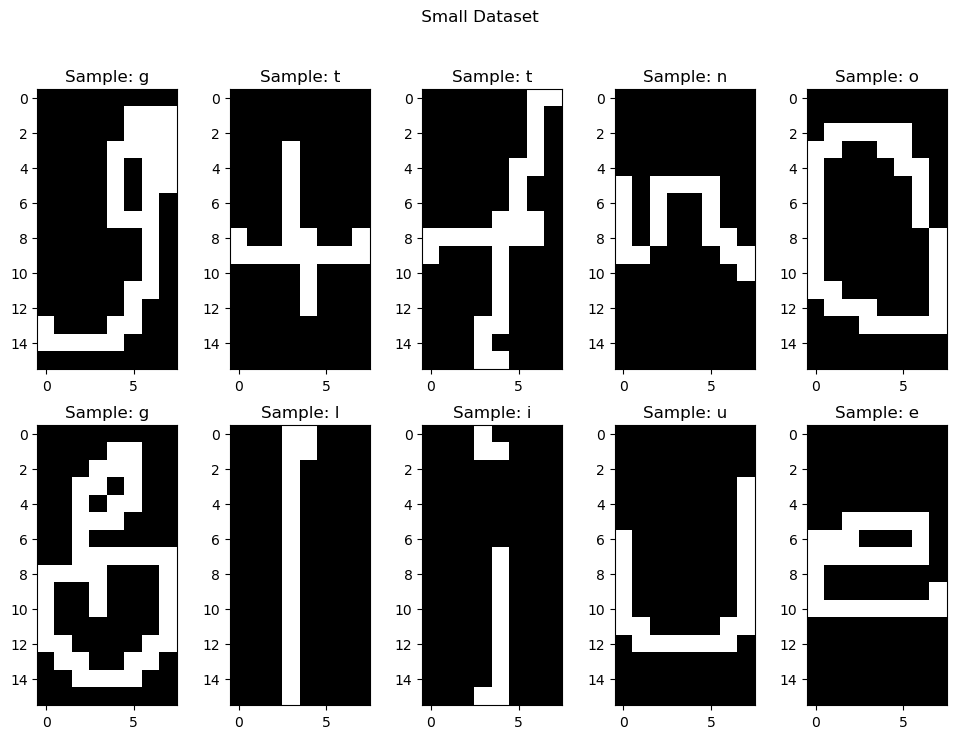

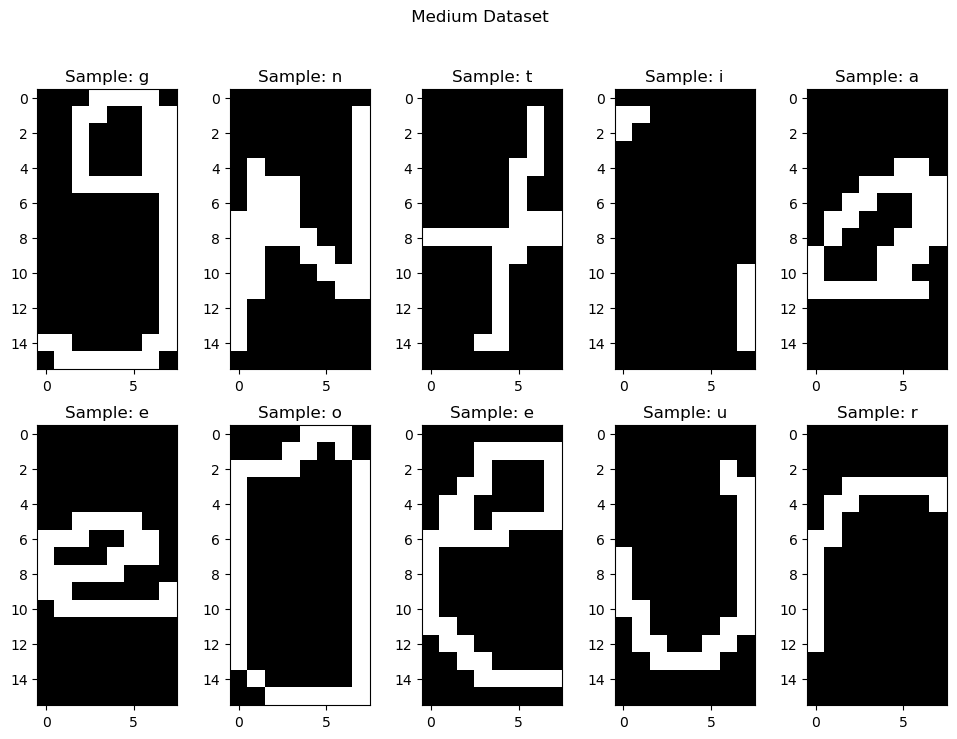

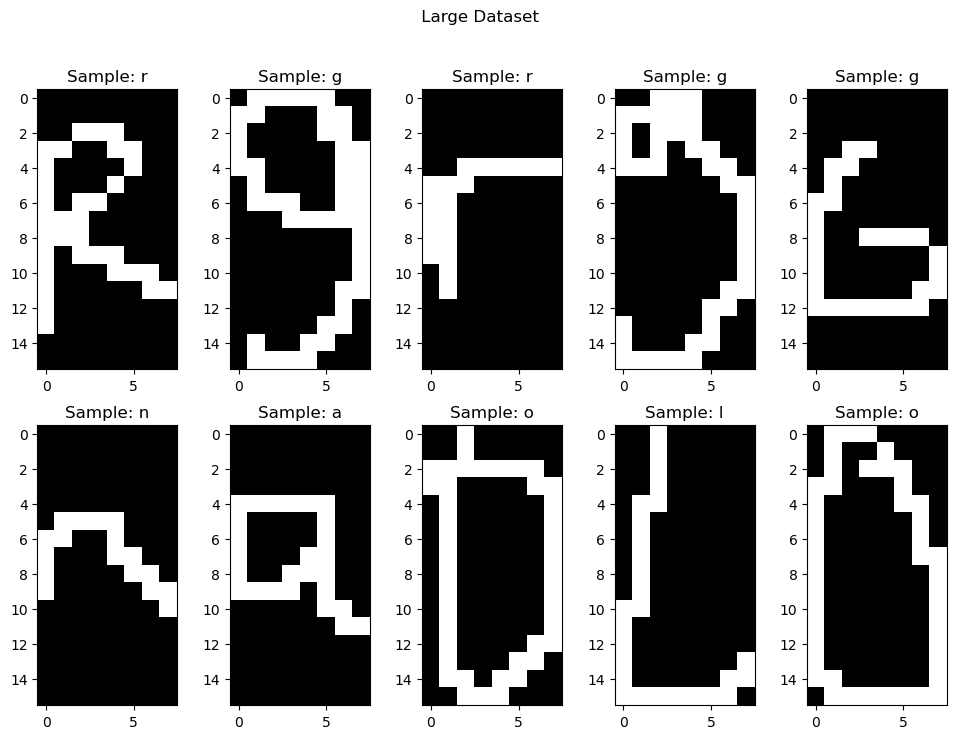

In [332]:
# 读取CSV文件并展示样本
def read_csv_and_display_samples(csv_file, dataset_name = 'small', show_flag = True, predict_res = None):
    df = pd.read_csv(csv_file, header=None)

    # 随机选择10个样本
    random_samples = df.sample(n=10, replace=False)
    random_samples_index = random_samples.index     # 获取随机样本的索引


    # 从CSV中提取图像数据
    image_data = random_samples.drop(0, axis=1).values
    image_class = random_samples[0].values

    # a,” 1 to “e,” 2 to “g,” 3 to “i,” 4 to “l,” 5 to “n,” 6 to “o,” 7 to “r,” 8 to “t,” and 9 to “u.” 
    id_2_name = {0:'a', 1:'e', 2:'g', 3:'i', 4:'l', 5:'n', 6:'o', 7:'r', 8:'t', 9:'u'}

    if predict_res is not None:
        pass
        

    if show_flag:
        # 显示图像
        plt.figure(figsize=(12, 8))
        for i in range(10):
            plt.subplot(2, 5, i + 1) 
            image = image_data[i].reshape(16, 8)

            plt.imshow(image, cmap='gray')

            if predict_res is not None:
                plt.title(f"Sample: {id_2_name[image_class[i]]} \n Predict: {id_2_name[predict_res[random_samples_index[i]]]}")
            else:
                plt.title(f"Sample: {id_2_name[image_class[i]]}")

        plt.suptitle(f" {dataset_name} Dataset")
        plt.show()

    return df.drop(0, axis=1).values, df[0].values

# 读取并显示各个数据集的样本
small_train_x, small_train_label = read_csv_and_display_samples('./图像分类-dataset/smallTrain.csv', 'Small')
medium_train_x, medium_train_label = read_csv_and_display_samples('./图像分类-dataset/mediumTrain.csv', 'Medium')
large_train_x, large_train_label = read_csv_and_display_samples('./图像分类-dataset/largeTrain.csv', 'Large')

# 读取测试集
small_val_x, small_val_label = read_csv_and_display_samples('./图像分类-dataset/smallValidation.csv', 'Small', False)
medium_val_x, medium_val_label = read_csv_and_display_samples('./图像分类-dataset/mediumValidation.csv', 'Medium', False)
large_val_x, large_val_label = read_csv_and_display_samples('./图像分类-dataset/largeValidation.csv', 'Large', False)




##  2.3 三个数据集的训练与结果
1. 分别利用small、medium、large三个数据集中的训练集对模型进行训练，绘制出loss函数变化情况。
2. 模型训练完成后，分别在三个数据集的测试集上评价所训练出来的模型在测试集上预测准确率。
3. 在small、medium、large三个数据集的每个测试集上给出5个示例，即: (测试图像+模型预测标签)


In [333]:
def show_cost(cost_history):
    plt.plot(np.array(cost_history)[:,-1],label='Training Loss of all samples')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def acc_val(X, Y, params, dataset_name, nn_architecture):
    i = 0
    y_predict_result = []
    for x,y in zip(X, Y):
        y_hat, _ = forward(x, params, nn_architecture)
        y_predict_idx = np.argmax(y_hat)

        if y_predict_idx == y:
            i += 1
    
        y_predict_result.append(y_predict_idx)

    print(f"The accuracy of validation dataset is {i/Y.shape[0]}")

    read_csv_and_display_samples('./图像分类-dataset/'+dataset_name+'Validation.csv', dataset_name, True, y_predict_result)

    return i/Y.shape[0]



### 2.3.1 small数据集

[{'input_dim': 128, 'output_dim': 64, 'activation': <function sigmoid at 0x283b504a0>}, {'input_dim': 64, 'output_dim': 64, 'activation': <function sigmoid at 0x283b504a0>}, {'input_dim': 64, 'output_dim': 10, 'activation': <function softmax at 0x2819ff2e0>}]
epoch: 000 - cost: 1176.94870
epoch: 025 - cost: 565.93295
epoch: 050 - cost: 206.63201
epoch: 075 - cost: 114.78513


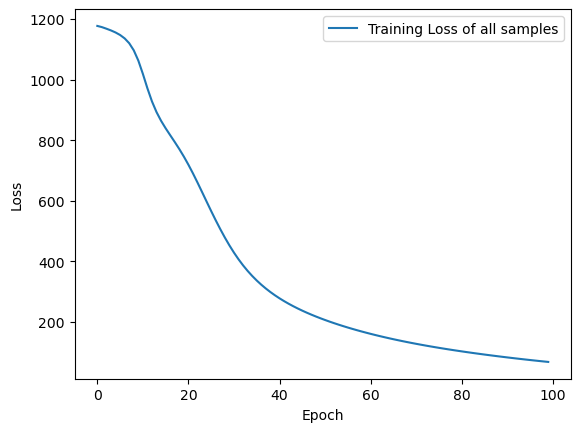

The accuracy of validation dataset is 0.66


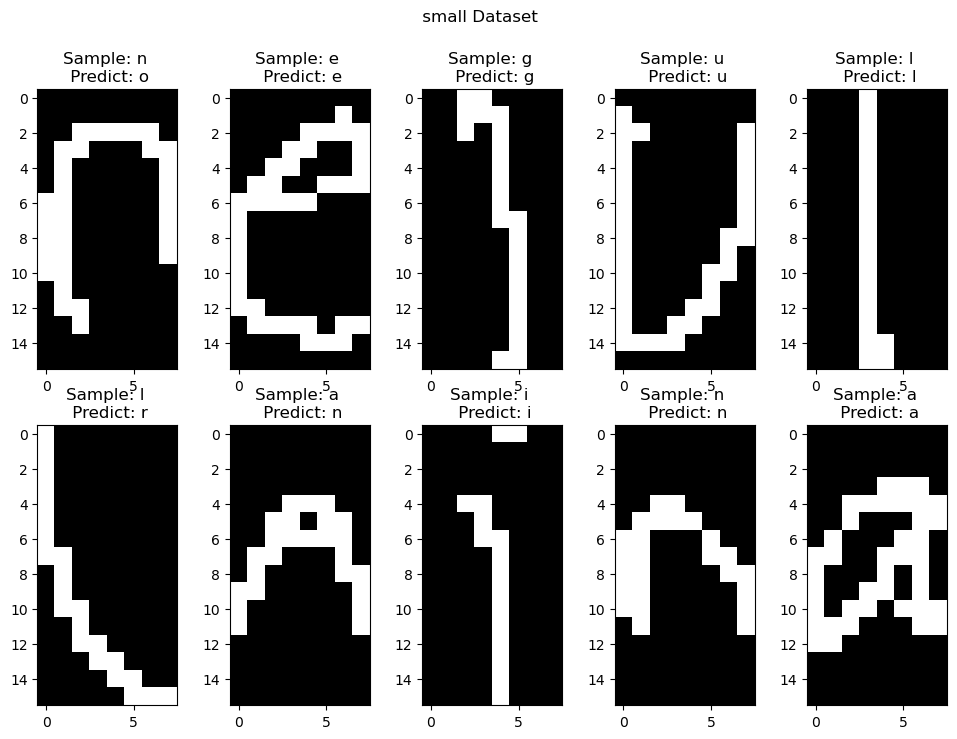

In [334]:
# 网络基本结构
nn_architecture = [
    {"input_dim": 128, "output_dim":64, "activation": sigmoid},
    {"input_dim": 64, "output_dim":64, "activation": sigmoid},
    {"input_dim": 64, "output_dim": 10, "activation": softmax},
]

# 准备训练数据
X = small_train_x
X = np.array(X).reshape(-1, X.shape[1])
Y = np.zeros((len(small_train_label), 10))
for i in range(len(small_train_label)):
    Y[i, small_train_label[i]] = 1
Y = np.array(Y).reshape(-1, Y.shape[1])

# 训练
params, cost_history = train(X, Y, 100, 0.01, nn_architecture)
show_cost(cost_history)

# 准备验证数据
x_valid = small_val_x
x_valid = np.array(x_valid).reshape(-1,x_valid.shape[1])
y_valid = small_val_label

# 验证并展示
y_acc_result = acc_val(x_valid, y_valid, params, 'small', nn_architecture)

### 2.3.2 mid数据集

[{'input_dim': 128, 'output_dim': 64, 'activation': <function sigmoid at 0x283b504a0>}, {'input_dim': 64, 'output_dim': 64, 'activation': <function sigmoid at 0x283b504a0>}, {'input_dim': 64, 'output_dim': 10, 'activation': <function softmax at 0x2819ff2e0>}]
epoch: 000 - cost: 11575.16446
epoch: 025 - cost: 6373.38014
epoch: 050 - cost: 3575.07253
epoch: 075 - cost: 2935.36407
epoch: 100 - cost: 2580.16744
epoch: 125 - cost: 2307.72805
epoch: 150 - cost: 2071.83013
epoch: 175 - cost: 1858.82658
epoch: 200 - cost: 1663.84884
epoch: 225 - cost: 1486.12924
epoch: 250 - cost: 1325.94323
epoch: 275 - cost: 1182.60222


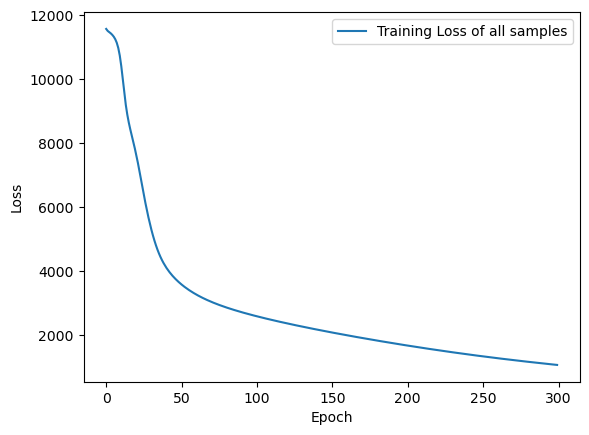

The accuracy of validation dataset is 0.863


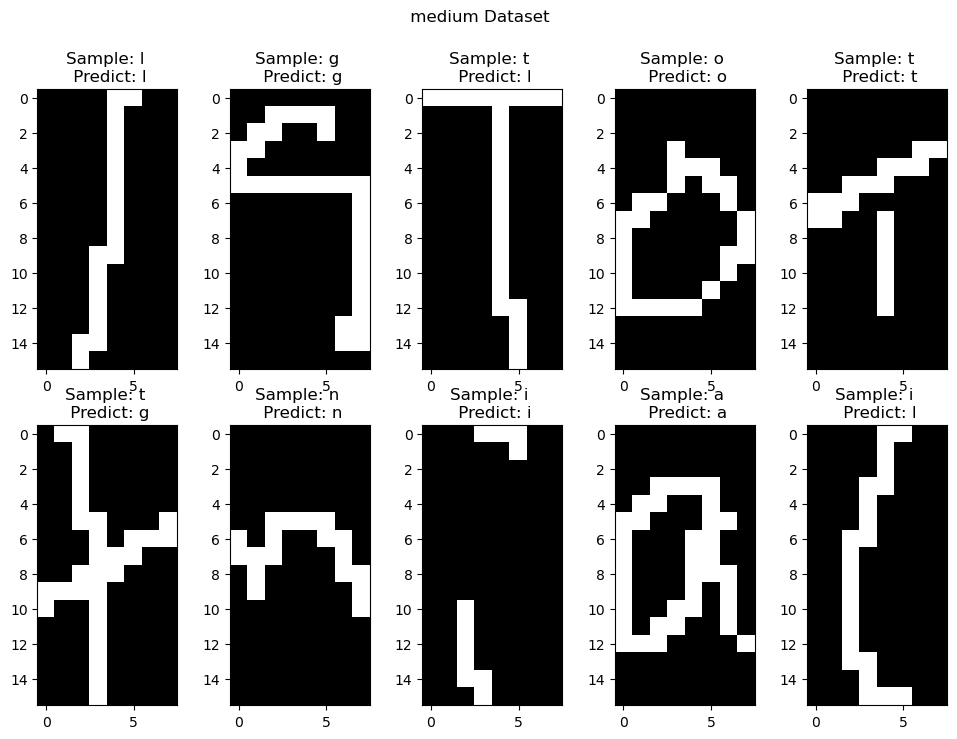

In [335]:
# 网络基本结构


# 准备训练数据
X = medium_train_x
X = np.array(X).reshape(-1, X.shape[1])
Y = np.zeros((len(medium_train_label), 10))
for i in range(len(medium_train_label)):
    Y[i, medium_train_label[i]] = 1
Y = np.array(Y).reshape(-1, Y.shape[1])

# 训练
params, cost_history = train(X, Y, 300, 0.001, nn_architecture)
show_cost(cost_history)

# 准备验证数据
x_valid = medium_val_x
x_valid = np.array(x_valid).reshape(-1,x_valid.shape[1])
y_valid = medium_val_label

# 验证
y_acc_result = acc_val(x_valid, y_valid, params, 'medium', nn_architecture)


### 2.3.3 large数据集

[{'input_dim': 128, 'output_dim': 64, 'activation': <function sigmoid at 0x283b504a0>}, {'input_dim': 64, 'output_dim': 64, 'activation': <function sigmoid at 0x283b504a0>}, {'input_dim': 64, 'output_dim': 10, 'activation': <function softmax at 0x2819ff2e0>}]
epoch: 000 - cost: 20775.93637
epoch: 025 - cost: 6498.62137
epoch: 050 - cost: 4801.65590
epoch: 075 - cost: 4033.46909
epoch: 100 - cost: 3474.82985
epoch: 125 - cost: 3023.90849
epoch: 150 - cost: 2646.58167
epoch: 175 - cost: 2323.36635
epoch: 200 - cost: 2040.85104
epoch: 225 - cost: 1792.58756
epoch: 250 - cost: 1575.13016
epoch: 275 - cost: 1386.45607


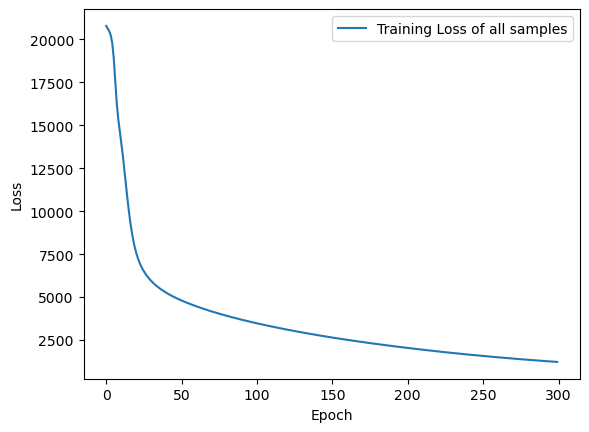

The accuracy of validation dataset is 0.873


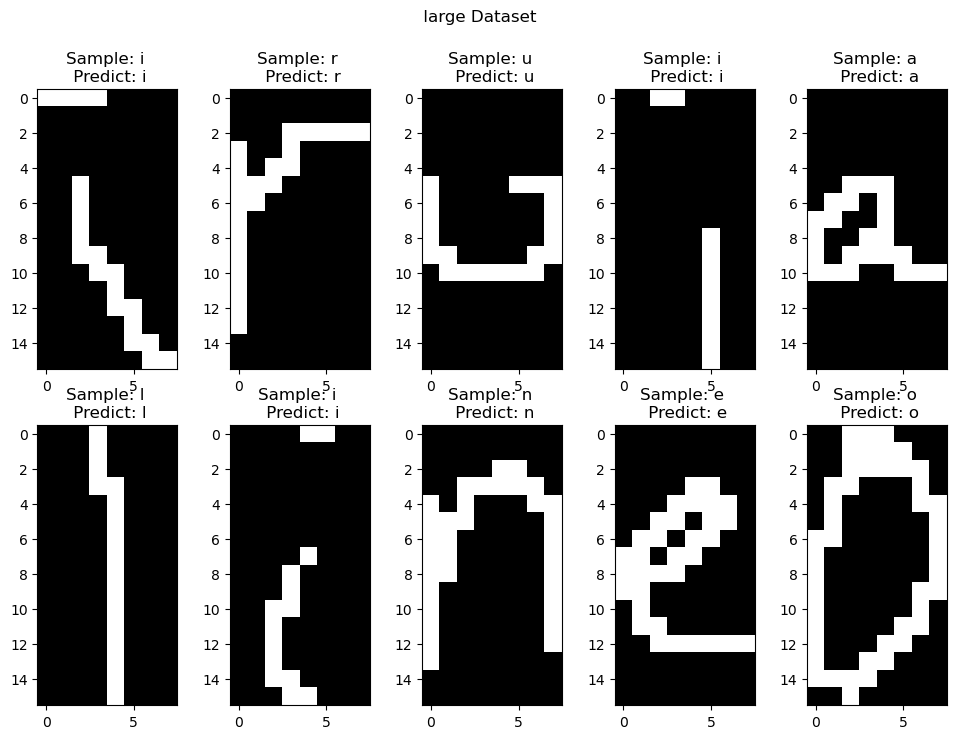

In [336]:
# 网络基本结构


# 准备训练数据
X = large_train_x
X = np.array(X).reshape(-1, X.shape[1])
Y = np.zeros((len(large_train_label), 10))
for i in range(len(large_train_label)):
    Y[i, large_train_label[i]] = 1
Y = np.array(Y).reshape(-1, Y.shape[1])

# 训练
params, cost_history = train(X, Y, 300, 0.001, nn_architecture)
show_cost(cost_history)

# 准备验证数据
x_valid = large_val_x
x_valid = np.array(x_valid).reshape(-1,x_valid.shape[1])
y_valid = large_val_label

# 验证
y_acc_result = acc_val(x_valid, y_valid, params, 'large', nn_architecture)

## 2.4 使用pytorch搭建网络

In [368]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

# 定义模型
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear1 = nn.Linear(128, 64)
        self.linear2 = nn.Linear(64, 64)
        self.linear3 = nn.Linear(64, 10)

    def forward(self, x):
        x = nn.functional.sigmoid(self.linear1(x))
        x = nn.functional.sigmoid(self.linear2(x))
        return nn.functional.softmax(self.linear3(x))


# 重写验证与展示函数
def acc_val_torch(X, Y, dataset_name, model):
    i = 0
    y_predict_result = []
    for x,y in zip(X, Y):
        y_hat = model(x.unsqueeze(0))
        y_predict_idx = torch.argmax(y_hat)

        if y_predict_idx == y:
            i += 1
    
        y_predict_result.append(y_predict_idx.item())

    print(f"The accuracy of validation dataset is {i/Y.shape[0]}")

    read_csv_and_display_samples('./图像分类-dataset/'+dataset_name+'Validation.csv', dataset_name, True, y_predict_result)


## 2.5 pytorch模型对三个数据集的训练与结果

### 2.5.1 small数据集

/var/folders/dm/cmsrk78d5nj0z9l_9zyb6yjc0000gn/T/ipykernel_19502/1248741551.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(self.linear3(x))


0.236s after last print. Epoch =  0, Loss: 1107.0603
4.494s after last print. Epoch = 20, Loss: 770.4341
4.539s after last print. Epoch = 40, Loss: 754.6984
4.338s after last print. Epoch = 60, Loss: 758.9672
4.273s after last print. Epoch = 80, Loss: 759.1582


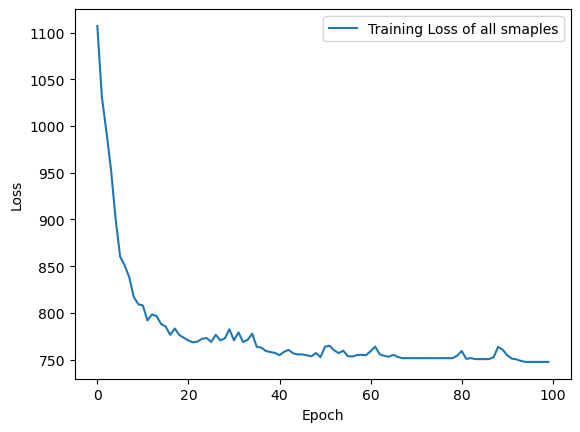

The accuracy of validation dataset is 0.7


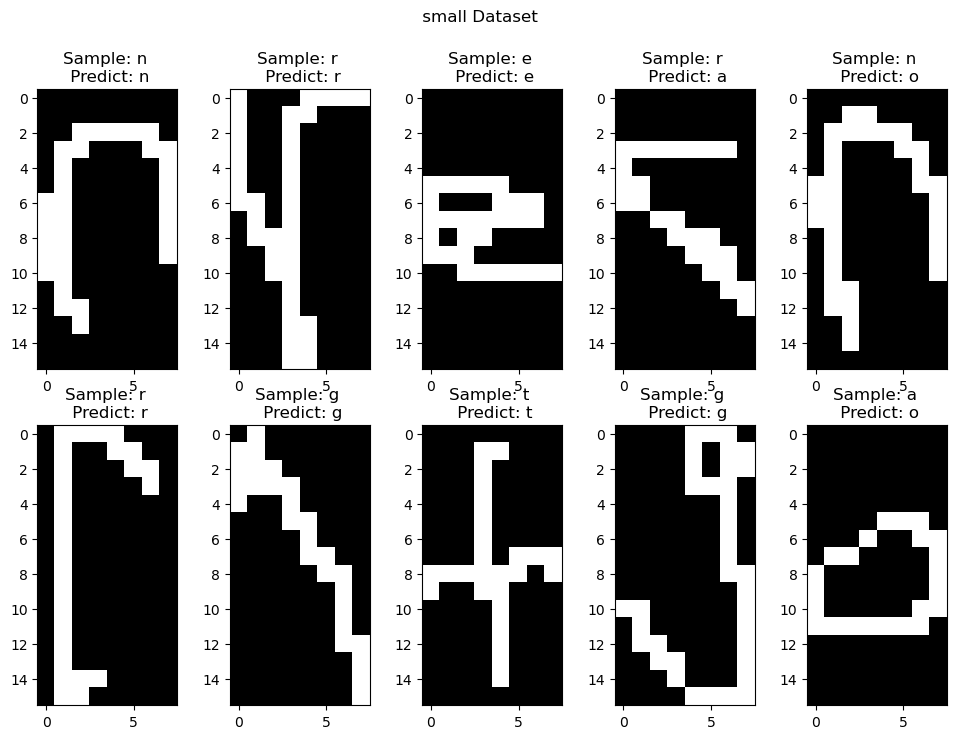

In [369]:
device = 'cpu'
model = RegressionModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
epochs = 100


# 准备训练数据
X = small_train_x
X = np.array(X).reshape(-1, X.shape[1])
Y = np.zeros((len(small_train_label), 10))
for i in range(len(small_train_label)):
    Y[i, small_train_label[i]] = 1
Y = np.array(Y).reshape(-1, Y.shape[1])

X = torch.from_numpy(X).float().to(device)
Y = torch.from_numpy(Y).float().to(device)

strat_time = time.time()
epoch_end_time = strat_time
cost_history = []
# 训练
for epoch in range(epochs):
    cost = 0
    for x, y in zip(X, Y):
        # x, y = x.to(device), y.to(device)
        y_pred = model(x)
        loss = criterion(y_pred, y)
        cost += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if epoch  % 20 == 0:
        strat_time = epoch_end_time
        epoch_end_time = time.time()
        print(f'{(epoch_end_time - strat_time):.3f}s after last print. Epoch ={epoch:3}, Loss: {cost.item():.4f}')
    
    cost_history.append(cost.item())

# 打印loss曲线
plt.plot(np.array(cost_history),label='Training Loss of all smaples')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 准备验证数据
X_valid = small_val_x
X_valid = np.array(X_valid).reshape(-1,X_valid.shape[1])
Y_valid = small_val_label

X_valid = torch.from_numpy(X_valid).float()
Y_valid = torch.from_numpy(Y_valid).float()


acc_val_torch(X_valid, Y_valid, 'small', model)

### 2.5.2 medium数据集

/var/folders/dm/cmsrk78d5nj0z9l_9zyb6yjc0000gn/T/ipykernel_19502/1248741551.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(self.linear3(x))


2.248s after last print. Epoch =  0, Loss: 10454.2559
42.688s after last print. Epoch = 20, Loss: 7731.0142
42.932s after last print. Epoch = 40, Loss: 7626.0264
43.713s after last print. Epoch = 60, Loss: 7586.3213
43.134s after last print. Epoch = 80, Loss: 7568.0107
43.028s after last print. Epoch =100, Loss: 7550.9414
43.214s after last print. Epoch =120, Loss: 7540.5645
42.798s after last print. Epoch =140, Loss: 7532.8408


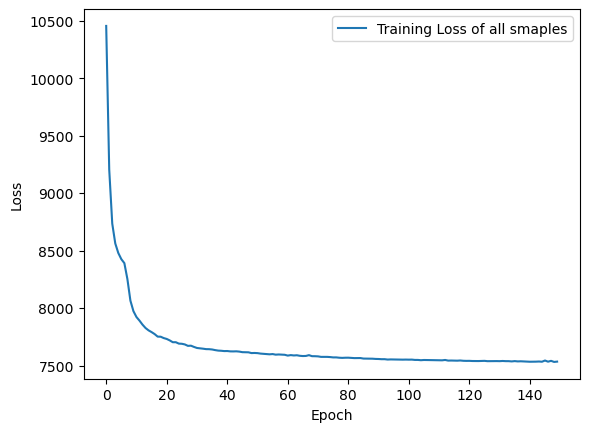

The accuracy of validation dataset is 0.87


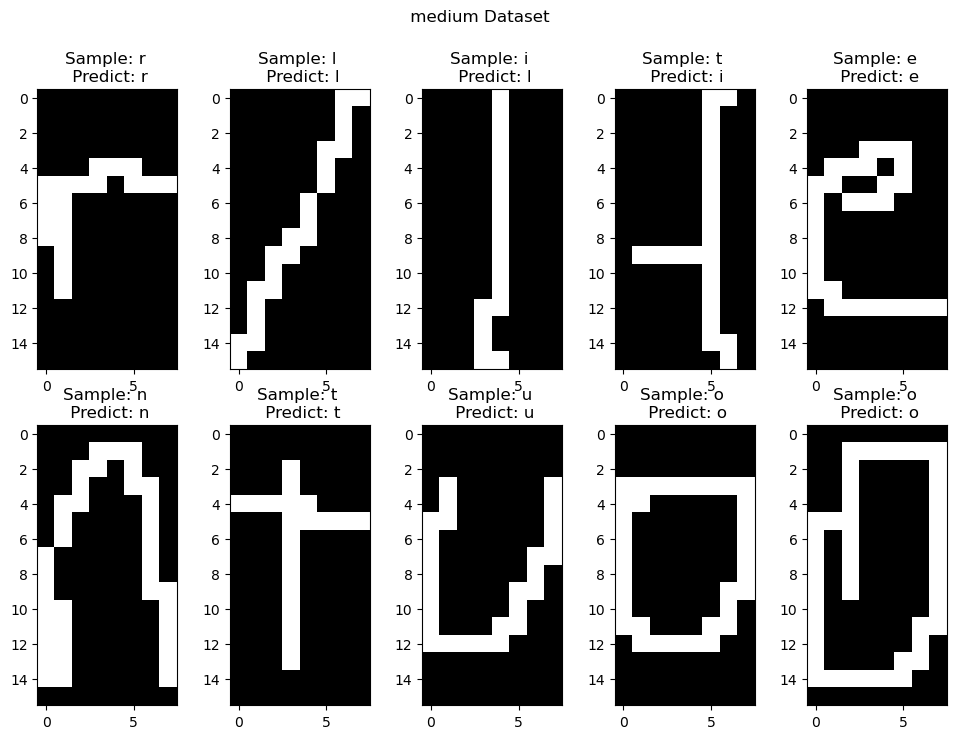

In [371]:
device = 'cpu'
model = RegressionModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
epochs = 150


# 准备训练数据
X = medium_train_x
X = np.array(X).reshape(-1, X.shape[1])
Y = np.zeros((len(medium_train_label), 10))
for i in range(len(medium_train_label)):
    Y[i, medium_train_label[i]] = 1
Y = np.array(Y).reshape(-1, Y.shape[1])

X = torch.from_numpy(X).float().to(device)
Y = torch.from_numpy(Y).float().to(device)

strat_time = time.time()
epoch_end_time = strat_time
cost_history = []
# 训练
for epoch in range(epochs):
    cost = 0
    for x, y in zip(X, Y):
        # x, y = x.to(device), y.to(device)
        y_pred = model(x)
        loss = criterion(y_pred, y)
        cost += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if epoch  % 20 == 0:
        strat_time = epoch_end_time
        epoch_end_time = time.time()
        print(f'{(epoch_end_time - strat_time):.3f}s after last print. Epoch ={epoch:3}, Loss: {cost.item():.4f}')
    
    cost_history.append(cost.item())

# 打印loss曲线
plt.plot(np.array(cost_history),label='Training Loss of all smaples')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 准备验证数据
X_valid = medium_val_x
X_valid = np.array(X_valid).reshape(-1,X_valid.shape[1])
Y_valid = medium_val_label

X_valid = torch.from_numpy(X_valid).float()
Y_valid = torch.from_numpy(Y_valid).float()


acc_val_torch(X_valid, Y_valid, 'medium', model)

### 2.5.3 large数据集

/var/folders/dm/cmsrk78d5nj0z9l_9zyb6yjc0000gn/T/ipykernel_19502/1248741551.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(self.linear3(x))


4.013s after last print. Epoch =  0, Loss: 17138.8301
77.536s after last print. Epoch = 20, Loss: 13790.8066
78.320s after last print. Epoch = 40, Loss: 13639.1143
77.243s after last print. Epoch = 60, Loss: 13597.8896
77.165s after last print. Epoch = 80, Loss: 13557.3320
77.336s after last print. Epoch =100, Loss: 13536.8975
77.270s after last print. Epoch =120, Loss: 13520.9150
77.368s after last print. Epoch =140, Loss: 13493.4688
77.153s after last print. Epoch =160, Loss: 13479.4131
77.275s after last print. Epoch =180, Loss: 13471.5557


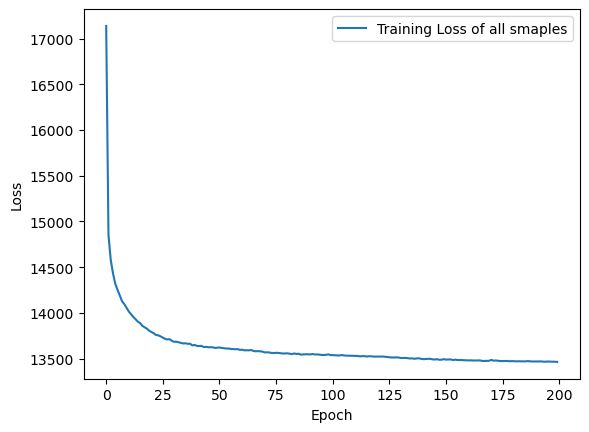

The accuracy of validation dataset is 0.861


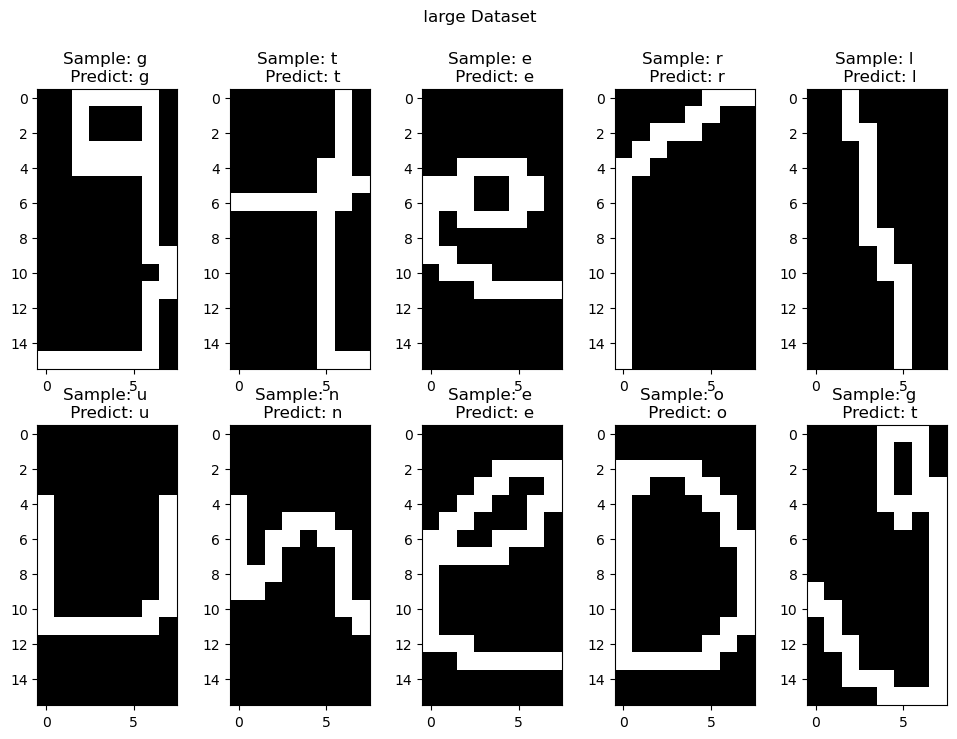

In [376]:
device = 'cpu'
model = RegressionModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
epochs = 200


# 准备训练数据
X = large_train_x
X = np.array(X).reshape(-1, X.shape[1])
Y = np.zeros((len(large_train_label), 10))
for i in range(len(large_train_label)):
    Y[i, large_train_label[i]] = 1
Y = np.array(Y).reshape(-1, Y.shape[1])

X = torch.from_numpy(X).float().to(device)
Y = torch.from_numpy(Y).float().to(device)

strat_time = time.time()
epoch_end_time = strat_time
cost_history = []
# 训练
for epoch in range(epochs):
    cost = 0
    for x, y in zip(X, Y):
        # x, y = x.to(device), y.to(device)
        y_pred = model(x)
        loss = criterion(y_pred, y)
        cost += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if epoch  % 20 == 0:
        strat_time = epoch_end_time
        epoch_end_time = time.time()
        print(f'{(epoch_end_time - strat_time):.3f}s after last print. Epoch ={epoch:3}, Loss: {cost.item():.4f}')
    
    cost_history.append(cost.item())

# 打印loss曲线
plt.plot(np.array(cost_history),label='Training Loss of all smaples')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 准备验证数据
X_valid = large_val_x
X_valid = np.array(X_valid).reshape(-1,X_valid.shape[1])
Y_valid = large_val_label

X_valid = torch.from_numpy(X_valid).float()
Y_valid = torch.from_numpy(Y_valid).float()


acc_val_torch(X_valid, Y_valid, 'large', model)

# 任务三 numpy/torch实现前向神经网络的回归预测

## 3.1 加载数据集并展示

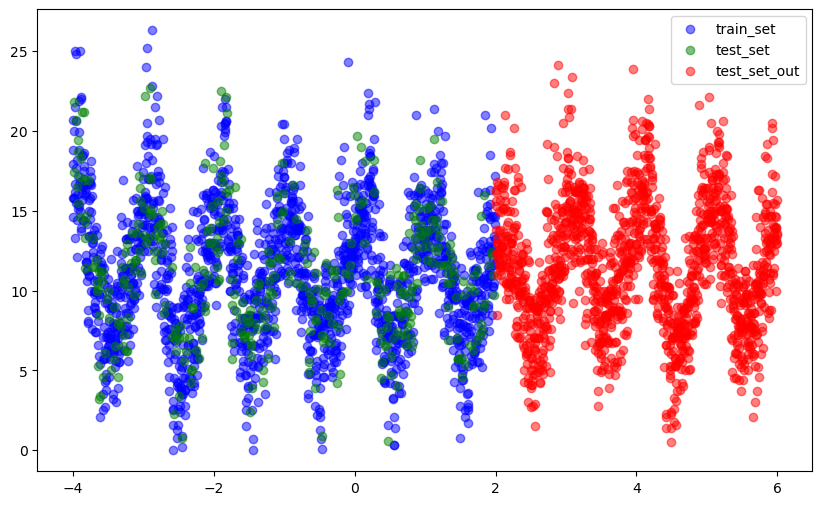

In [377]:
# 加载数据集
data_train = pd.read_csv('./回归-dataset/data_train.csv')
data_valid = pd.read_csv('./回归-dataset/data_valid.csv')
data_test = pd.read_csv('./回归-dataset/data_test.csv')

# 分割原始训练集
train_set = data_train.sample(n=1800, random_state=34567) # 训练集（分布内）
test_set = data_train.drop(train_set.index) # 测试集（分布内）

# print(test_set['X'].values.shape)

# 合并原始验证集和测试集
test_set_out = pd.concat([data_valid, data_test], ignore_index=True) # 测试集（分布外）

# plot
plt.figure(figsize=(10, 6))
plt.scatter(train_set['X'], train_set['Y'], c='blue', label='train_set', alpha=0.5)
plt.scatter(test_set['X'], test_set['Y'], c='green', label='test_set', alpha=0.5)
plt.scatter(test_set_out['X'], test_set_out['Y'], c='red', label='test_set_out', alpha=0.5)
plt.legend()
plt.show()


## 3.2 搭建神经网络

均方误差MSE损失函数：$MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y_i})^2$

均方根误差RMSE损失函数：$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y_i})^2}$

其中，$n$为样本数量，$y_i$为第$i$个样本的真实值，$\hat{y_i}$为第$i$个样本的预测值。
RMSE与MSE类似，但是RMSE对误差较大的样本更加敏感。


MSE损失函数对预测值$\hat{y_i}$的导数可以通过以下公式计算：

$\frac{\partial MSE}{\partial \hat{y_i}} = \frac{2}{n}(\hat{y_i} - y_i)$


In [378]:
# rmse损失函数
def rmse_loss(y_hat, y):
    return np.sqrt(np.mean((y - y_hat)**2))

# 重写backward函数
def backward_classification(Y_hat, Y, memory, params, nn_architecture):
    grads_values = {}
    Y = Y.reshape(Y_hat.shape)

    # 最后一层L_to_Z
    dL_to_Z = (Y_hat - Y).reshape(1) # MSE损失梯度 bp1
    A_prev = memory["A" + str(len(nn_architecture)-1)]

    
    dW_curr = np.outer(dL_to_Z, A_prev)    # bp3
    db_curr = dL_to_Z # bp4

    grads_values["dW" + str(len(nn_architecture))] = dW_curr
    grads_values["db" + str(len(nn_architecture))] = db_curr


    # 从最后第二层开始计算反向传播
    for idx, layer in reversed(list(enumerate(nn_architecture))[:-1]):
        layer_idx = idx + 1
        dL_to_Z_next = dL_to_Z

        # 开始本层方向传播
        activ_function_curr = layer["activation"]
        A_prev = memory["A" + str(idx)]
        Z_curr = memory["Z" + str(layer_idx)]
        W_next = params["W" + str(layer_idx + 1)]
        b_curr = params["b" + str(layer_idx)]
        active_func_backward = globals()[activ_function_curr.__name__ + '_backward']

        dL_to_Z = (W_next.T @ dL_to_Z_next) * active_func_backward(A_prev, Z_curr) # bp2
        dW_curr = np.outer(dL_to_Z, A_prev)   # bp3
        db_curr = dL_to_Z


        grads_values["dW" + str(layer_idx)] = dW_curr
        grads_values["db" + str(layer_idx)] = db_curr

    return grads_values



# 重写Train函数
def train_classification(X, Y, epochs, learning_rate, nn_architecture):
    cost_history = [] # 二维数组，记录每一次迭代、每一个样本造成的损失值
    params = init_layers(nn_architecture, 123)

    for i in range(epochs):
        cost_history = [] # 一维数组，记录每一次迭代的总损失值

        Y_hat = []
        # 前向传播
        for x,y in zip(X,Y):
            y_hat, cache = forward(x, params, nn_architecture)
            Y_hat.append(y_hat)

            grads_values = backward_classification(y_hat, y, cache, params, nn_architecture)
            params = update(params, grads_values, nn_architecture, learning_rate)
        
        cost = rmse_loss(np.array(Y_hat), Y)
        cost_history.append(cost)

        if i % 25 == 0:
            print("epoch: {:03} - cost: {:.5f}".format(i, cost))


        # 观察cost记录中最后10个数据，如果变化幅度不超过1%，就停止
        stop_flag = False
        if len(cost_history) > 10:
            last_10_costs = np.array(cost_history)[-10:]
            max_cost = max(last_10_costs)
            min_cost = min(last_10_costs)
            if (max_cost - min_cost) / max_cost < 0.01:
                stop_flag = True
        if stop_flag:
            print(f"Training stopped due to small cost change in epoch {i}.")
            break
        
    return params, cost_history

In [379]:
def rmse_val(X, Y, params, dataset_name, nn_architecture):

    Y_predict = []
    rmse_loss_value = 0
    for x in X:
        y_hat, _ = forward(x, params, nn_architecture)

        Y_predict.append(y_hat)
        
    rmse_loss_value = rmse_loss(np.array(Y_predict), Y)

    print(f"The rmse loss of {dataset_name} dataset is {rmse_loss_value}")

    return Y_predict

In [399]:
# 网络基本结构
class_nn_architecture = [
    {"input_dim": 1, "output_dim":16, "activation": sigmoid},
    {"input_dim": 16, "output_dim":64, "activation": sigmoid},
    {"input_dim": 64, "output_dim":1, "activation": linear},
]

# 准备训练数据
X = train_set['X'].values
Y = train_set['Y'].values

# 训练
params, cost_history = train_classification(X, Y, 1000, 0.001, class_nn_architecture)
# show_cost(cost_history)

# 准备验证数据
X_test = test_set['X'].values
Y_test = test_set['Y'].values

X_test_out = test_set_out['X'].values
Y_test_out = test_set_out['Y'].values

# 验证并展示
Y_predict = rmse_val(X, Y, params, 'train_set', class_nn_architecture)
Y_predict_test = rmse_val(X_test, Y_test, params, 'test_set', class_nn_architecture)
Y_predict_test_out = rmse_val(X_test_out, Y_test_out, params, 'test_set_out', class_nn_architecture)


[{'input_dim': 1, 'output_dim': 16, 'activation': <function sigmoid at 0x283b504a0>}, {'input_dim': 16, 'output_dim': 64, 'activation': <function sigmoid at 0x283b504a0>}, {'input_dim': 64, 'output_dim': 1, 'activation': <function linear at 0x2819fc220>}]
epoch: 000 - cost: 4.42540
epoch: 025 - cost: 4.20853
epoch: 050 - cost: 4.20721
epoch: 075 - cost: 4.20606
epoch: 100 - cost: 4.20524
epoch: 125 - cost: 4.20467
epoch: 150 - cost: 4.20427
epoch: 175 - cost: 4.20397
epoch: 200 - cost: 4.20371
epoch: 225 - cost: 4.20347
epoch: 250 - cost: 4.20323
epoch: 275 - cost: 4.20301
epoch: 300 - cost: 4.20280
epoch: 325 - cost: 4.20262
epoch: 350 - cost: 4.20248
epoch: 375 - cost: 4.20241
epoch: 400 - cost: 4.20246
epoch: 425 - cost: 4.20269
epoch: 450 - cost: 4.20318
epoch: 475 - cost: 4.20400
epoch: 500 - cost: 4.20520
epoch: 525 - cost: 4.20687
epoch: 550 - cost: 4.20892
epoch: 575 - cost: 4.21110
epoch: 600 - cost: 4.21343
epoch: 625 - cost: 4.21596
epoch: 650 - cost: 4.21873
epoch: 675 - co

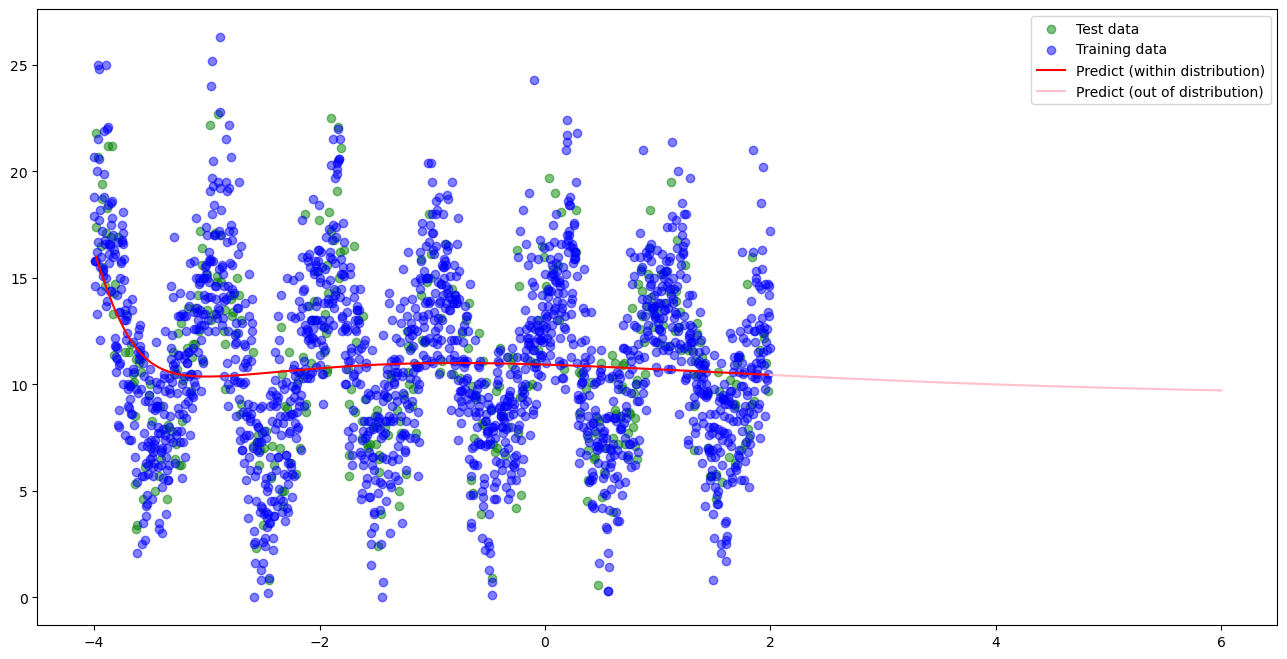

In [400]:
# 绘制训练好的神经网络回归曲线
plt.figure(figsize=(16, 8))
plt.scatter(X_test, Y_test, label='Test data', alpha = 0.5, c = 'green')
plt.scatter(X, Y, label='Training data', alpha = 0.5, c = 'blue')
plt.plot(X_test, Y_predict_test, label='Predict (within distribution)',c = 'red')
plt.plot(X_test_out, Y_predict_test_out, label='Predict (out of distribution)', c = 'pink')
plt.legend()
plt.show()

### 结果分析
增加训练轮次，能够有限度地提高在测试集（区间内）的拟合程度。增加到10000轮次能够拟合3-4个周期。训练区间外的数据未见到拟合结果。  
下方Pytorch实现的结果与Numpy实现的结果相同。
使用GPU（mps）未能提高效果

0.666s after last print. Epoch =  0, Loss: 13.4085
6.335s after last print. Epoch = 10, Loss: 13.9705
6.147s after last print. Epoch = 20, Loss: 13.8601
RMSE loss of test dataset within distribution is 3.93058947127609
RMSE loss of test dataset within distribution is 4.182853985302203


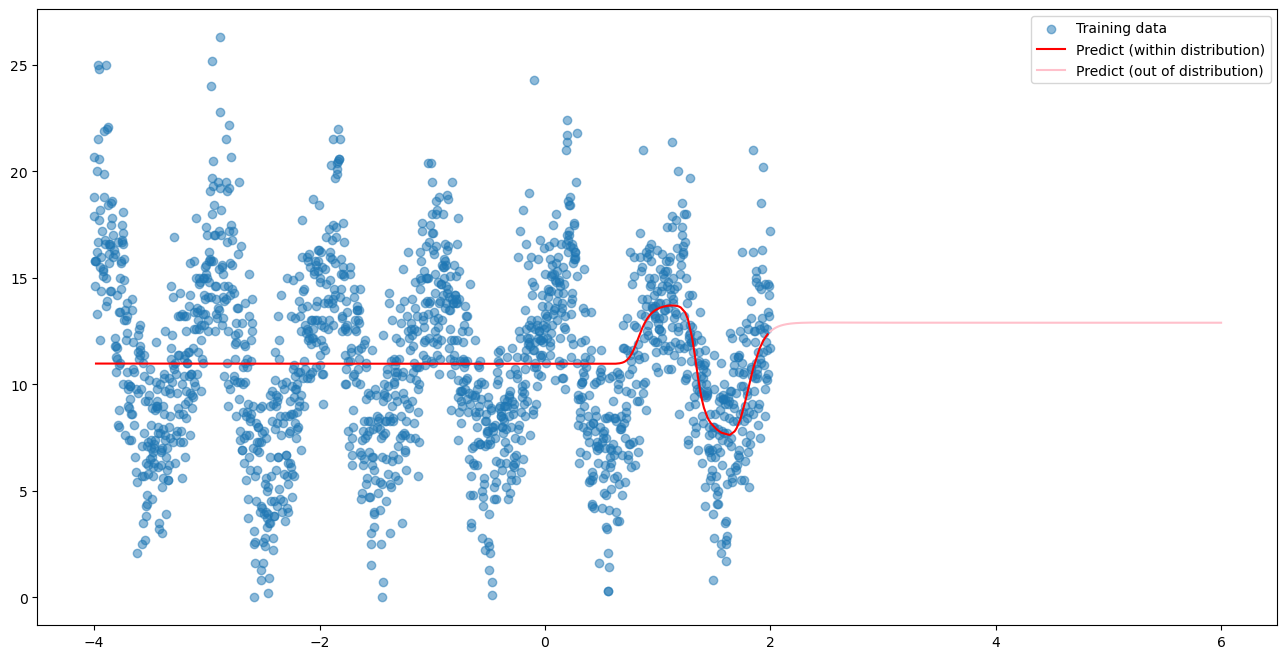

In [408]:
# 模型结构
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear1 = nn.Linear(1, 16)
        self.linear2 = nn.Linear(16, 31)
        self.linear3 = nn.Linear(31, 1)

    def forward(self, x):
        x = nn.functional.sigmoid(self.linear1(x))
        x = nn.functional.sigmoid(self.linear2(x))
        return self.linear3(x)

# 模型细节
device = "cpu"
model = RegressionModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()


# 准备数据
X = torch.from_numpy(train_set['X'].values).float().to(device)
Y = torch.from_numpy(train_set['Y'].values).float().to(device)

start_time = time.time()
epoch_end_time = start_time
for epoch in range(30):
    Y_pred = []
    for x, y in zip(X, Y):
        y_pred = model(x.unsqueeze(0))
        loss = criterion(y_pred, y.unsqueeze(0))

        Y_pred.append(y_pred.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if epoch  % 10 == 0:
        strat_time = epoch_end_time
        epoch_end_time = time.time()
        print(f'{(epoch_end_time - strat_time):.3f}s after last print. Epoch ={epoch:3}, Loss: {loss.item():.4f}')


# Test the model
X_test = torch.from_numpy(test_set['X'].values).float()
Y_test = torch.from_numpy(test_set['Y'].values).float()

Y_predict = []
for x in X_test:
    y_pred = model(x.unsqueeze(0))
    Y_predict.append(y_pred.item())

rmse_loss_value = rmse_loss(np.array(Y_predict), test_set['Y'].values)
print(f"RMSE loss of test dataset within distribution is {rmse_loss_value}")


X_test = torch.from_numpy(test_set_out['X'].values).float()
Y_test = torch.from_numpy(test_set_out['Y'].values).float()

Y_predict_out = []
for x in X_test:
    y_pred = model(x.unsqueeze(0))
    Y_predict_out.append(y_pred.item())

rmse_loss_value = rmse_loss(np.array(Y_predict_out), test_set_out['Y'].values)
print(f"RMSE loss of test dataset within distribution is {rmse_loss_value}")


plt.figure(figsize=(16, 8))
plt.scatter(train_set['X'].values, train_set['Y'].values, label='Training data', alpha = 0.5)
plt.plot(test_set['X'].values, Y_predict, label='Predict (within distribution)',c = 'red')
plt.plot(test_set_out['X'].values, Y_predict_out, label='Predict (out of distribution)', c = 'pink')
plt.legend()
plt.show()